# Quick VNC server on sunbird
Rather than typing the long ssh command we can save the command somewhere else. Here, I assume that you have already saved ssh private keys on Sunbird. 

Generally, the ssh connections can be saved at `$HOME/.ssh/config`. The contents of `config` file is as follows
```sh
(base) hell@Dell-Precision-T1600:~/.ssh$ cat $HOME/.ssh/config
Host	sunbird
	User	s.1915438
	HostName	sunbird.swansea.ac.uk
Host	sunbirdvnc
	User	s.1915438
	HostName	vnc.sunbird.swansea.ac.uk
	LocalForward	5901 localhost:5905
```

Here, I have saved the VNC login node details. The line `LocalForward	5901 localhost:5905` tells to forward `localhost:5905` from Sunbird to `5901` on my PC. Obviously, if the assigned VNC server port is different then we need to change the later port.

## Start VNC server
* Login with the `ssh sunbirdvnc` the localforward does not matter.
* Type `vncserver` to run a VNC server
```sh
[s.1915438@sl3 ~]$ vncserver

New 'sl3:5 (s.1915438)' desktop is sl3:5

Starting applications specified in /home/s.1915438/.vnc/xstartup
Log file is /home/s.1915438/.vnc/sl3:5.log
```

## Port forward
Exit the ssh connection and reconnect again `ssh sunbirdvnc`.
You will see this output.
```sh
TigerVNC server sessions:

X DISPLAY #	PROCESS ID
:5		163611
Your VNCServer port is set to 5905
Connect with a tunnel using ssh:  ssh -L 5900:localhost:5905 s.1915438@vnc.sunbird.swansea.ac.uk
```
Just copy the ssh command in the end. `ssh -L 5900:localhost:5905 s.1915438@vnc.sunbird.swansea.ac.uk`. Open a new terminal and paste it.

Now open VNC Viewer and select the VNC connection from previous VNC server connection.

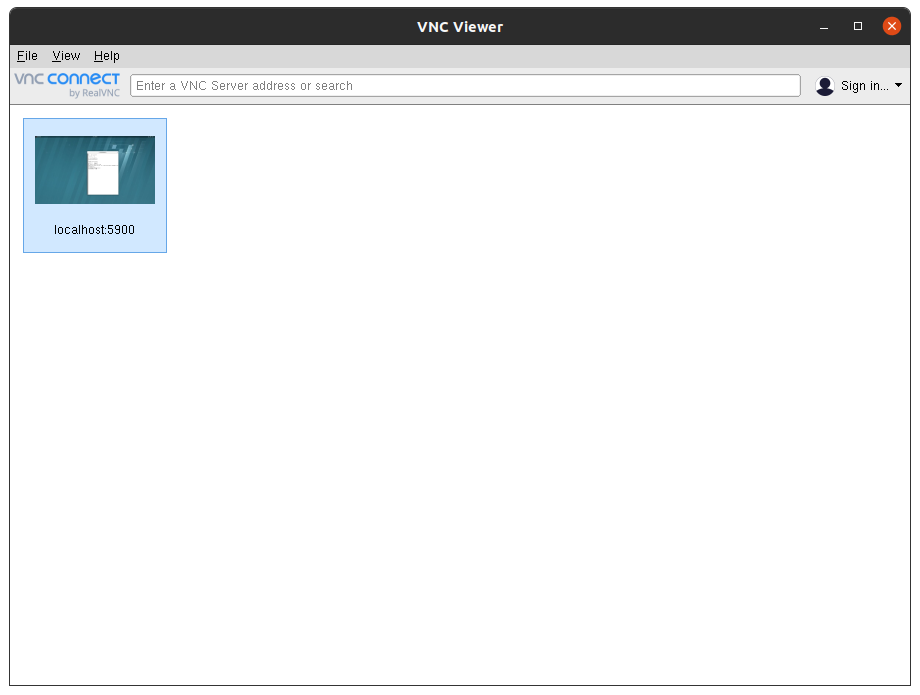

## Using GPUs in VNC session
Firstly, open a VNC session as we did earlier. We need to run an interactive job session using `salloc`. `sbatch` is for advanced option.

`salloc --nodes=1 --account=scwXXXX --reservation=scwXXXX_YY --partition=development`

For me
* nodes = 1
* account = scw1901 for ADDED Accelerated AI nodes
* partition = accel_ai
* gpu = 2

So the resource allocation command for me would be

`salloc --nodes=1 --gres=gpu:2 --account=scw1901 --partition=accel_ai`

```sh
[s.1915438@sl3 ~]$ salloc --nodes=1 --gres=gpu:2 --account=scw1901 --partition=accel_ai
salloc: Granted job allocation 7159153
salloc: Waiting for resource configuration
salloc: Nodes scs2042 are ready for job
```

Here we need to note down the node which we are assigned. In this case the node is `scs2042`.


## GPU job forwarding to VNC server
Open the VNC session in VNC viewer and and open GNOME using `gnome-session`. And then Open a terminal and type.

`ssh -X scs2042`

Change the node number with the nodes number that the system has assigned you.

## Checking GPUs
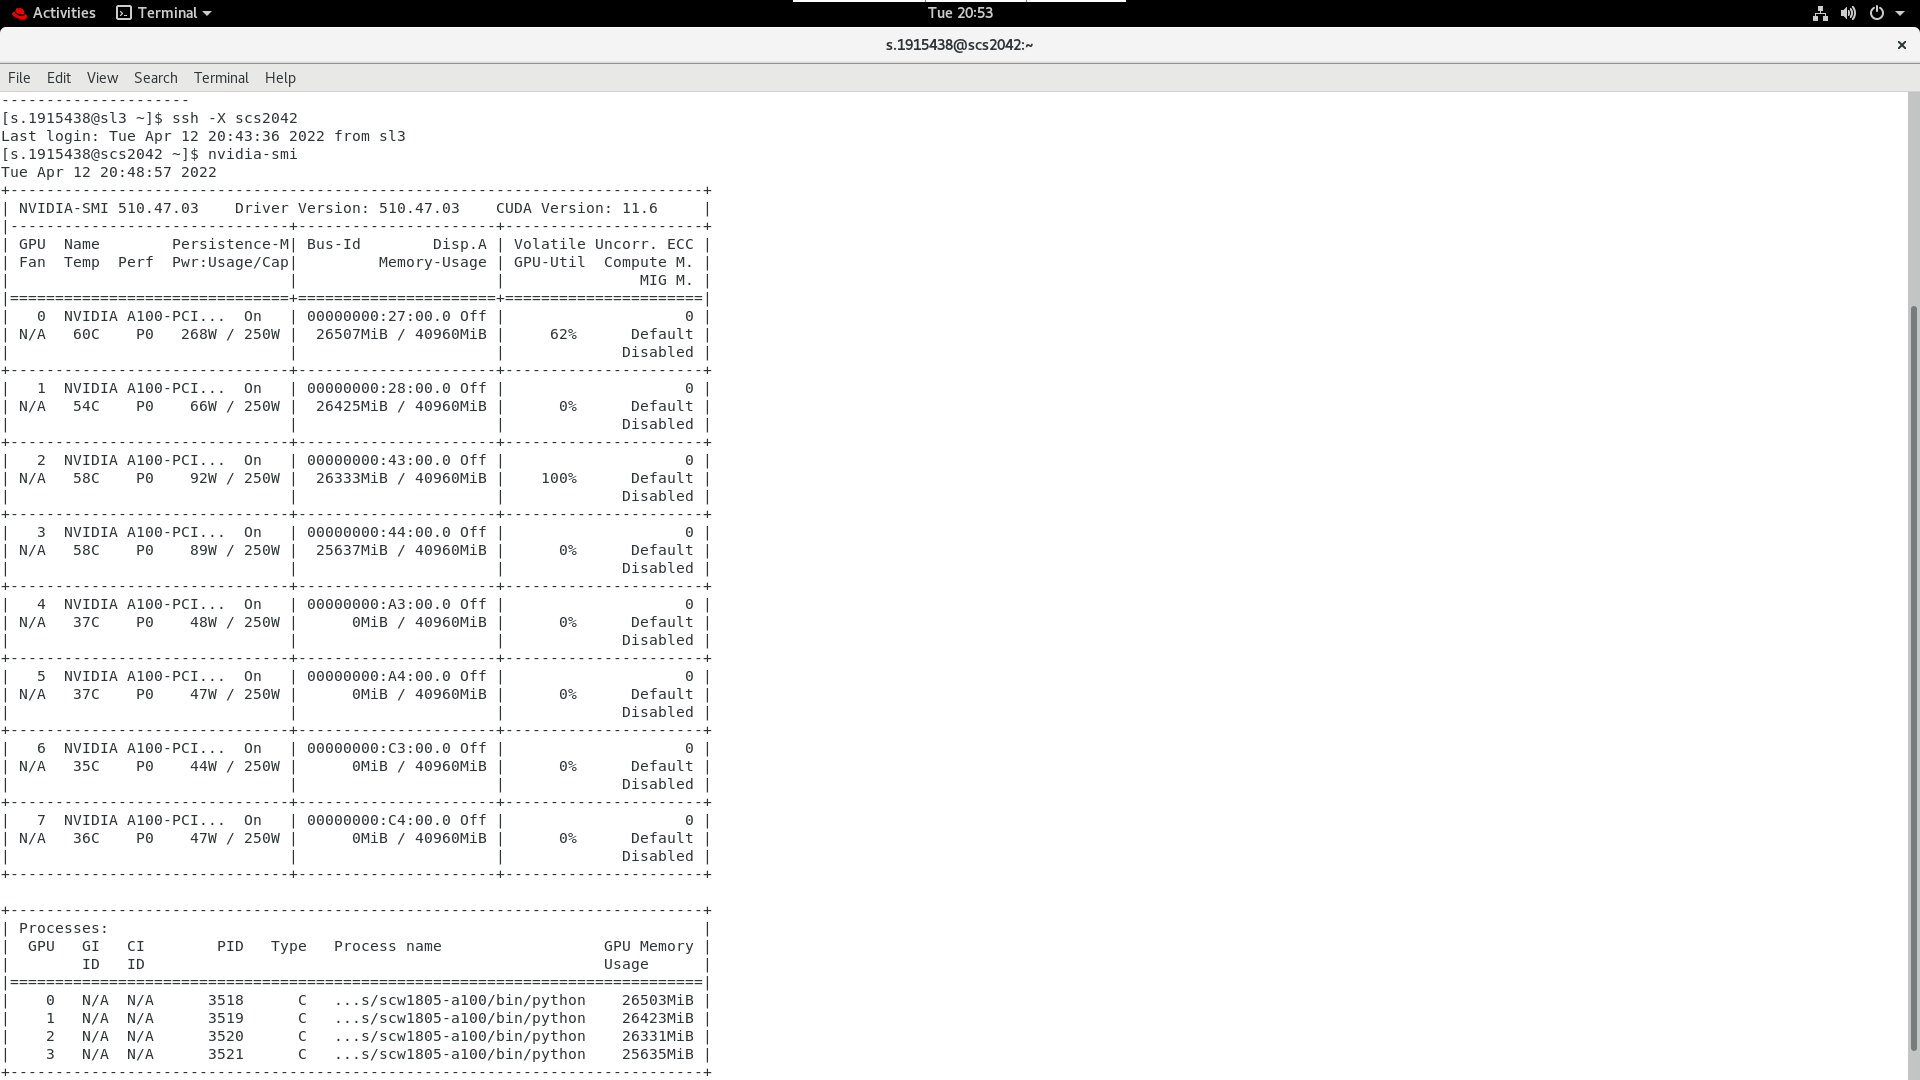

We can also use GPU accelerated Paraview.

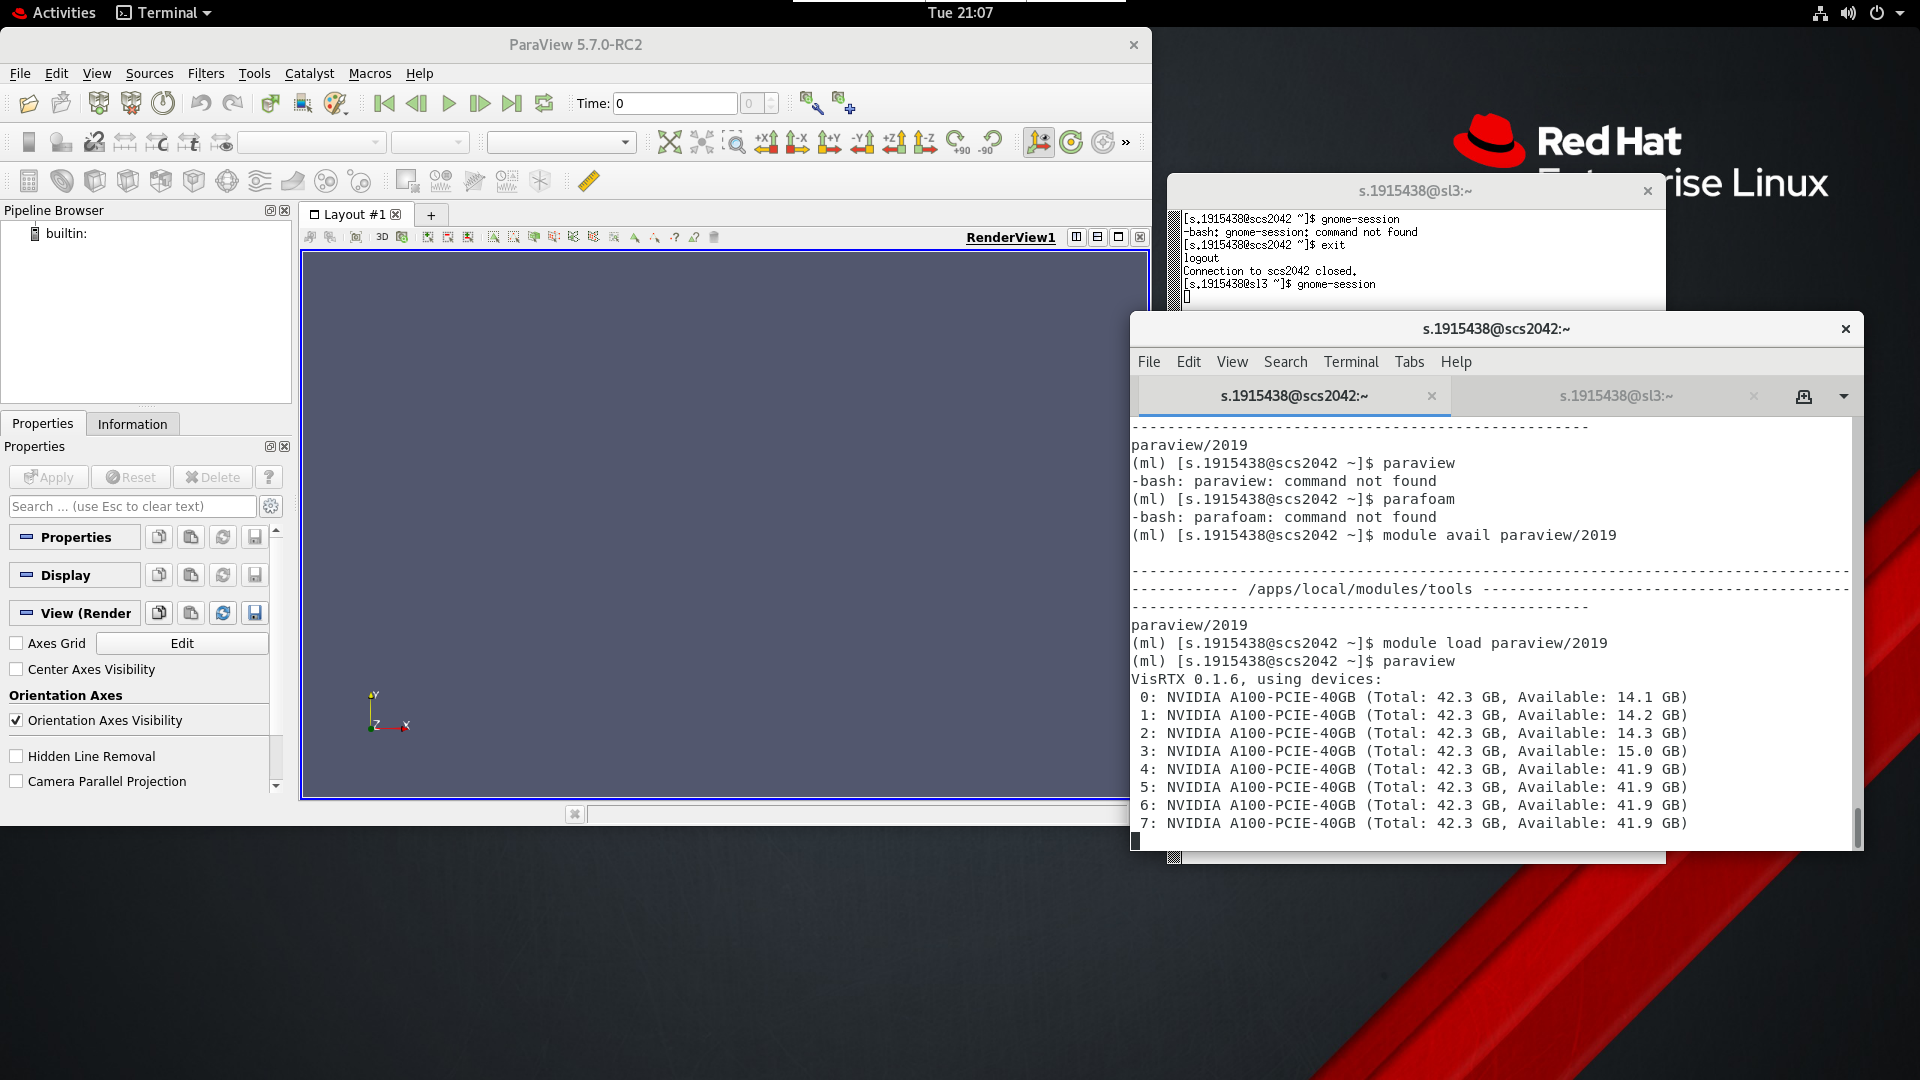